In [1]:
import PGFPlotsX: Axis, Plot, Plot3, TikzPicture, TikzDocument, push_preamble!,
                  Table, Expression, Coordinates, @pgf, GroupPlot

In [2]:
1+1

2

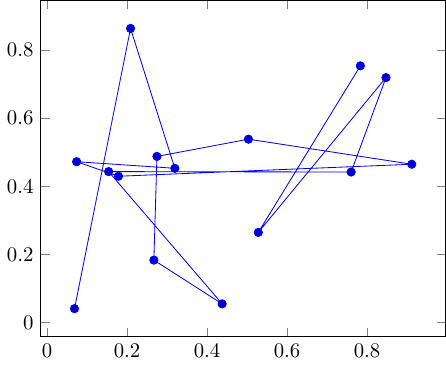

In [3]:
p = PGFPlotsX.Plot(
    PGFPlotsX.Coordinates(rand(15), rand(15)),
    "title" => "WOOO")
p

# Colors

In [4]:
using Colors

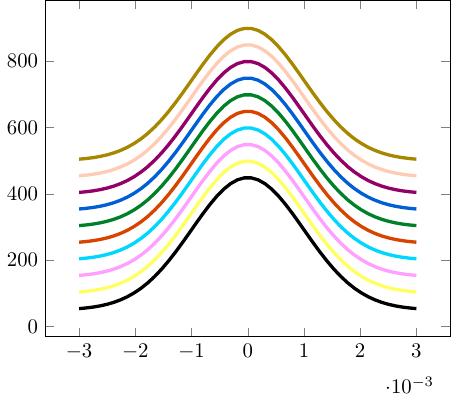

In [5]:
# Using a colorant as the line color
μ = 0
σ = 1e-3

plots = []

@pgf for (i, col) in enumerate(distinguishable_colors(10))
    offset = i * 50
    p = Plot(Expression("exp(-(x-$μ)^2 / (2 * $σ^2)) / ($σ * sqrt(2*pi)) + $offset"),
    {
        color = col, 
        domain = "-3*$σ:3*$σ",
        style = { ultra_thick },
        samples = 50
    }; incremental = false)
        
    push!(plots, p)
end
Axis(plots)

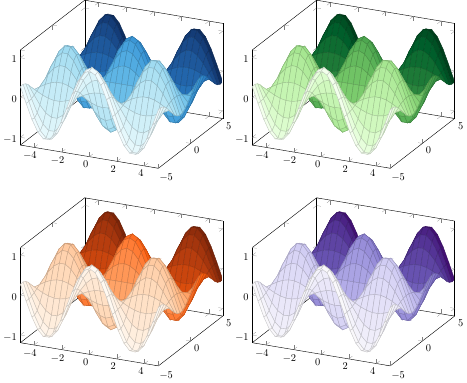

In [6]:
# Using Colormaps
@pgf begin
p = Plot3(Expression("cos(deg(x)) * sin(deg(y))"), { surf, point_meta = "y" }; incremental = false)
colormaps = ["Blues", "Greens", "Oranges", "Purples"]
td = TikzDocument()
for cmap in colormaps
    push_preamble!(td, (cmap, Colors.colormap(cmap)))
end

tp = TikzPicture("scale" => 0.5)
push!(td, tp) 
gp = GroupPlot({ group_style = {group_size = "2 by 2"}})
push!(tp, gp)
    
for cmap in colormaps
    push!(gp, p, { colormap_name = cmap })
end

end
# We use PNG here because the SVG becomes quite large, skip displaying if running tests
!haskey(ENV, "TESTING_PGFPLOTSX") && display("image/png", td)

# DataFrames

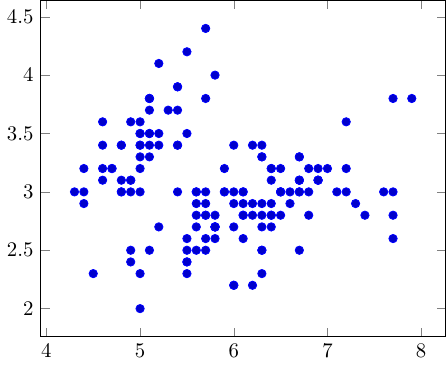

In [7]:
using DataFrames
using RDatasets
iris = @pgf Table(dataset("datasets", "iris"), {x = "SepalLength", y= "SepalWidth"})
a = @pgf Axis(Plot(iris, { only_marks }))

# Contours

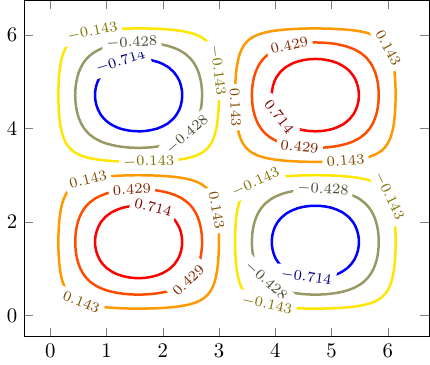

In [8]:
using Contour
x = 0.0:0.1:2π
y = 0.0:0.1:2π
f = (x,y) -> sin(x)*sin(y)
@pgf p = Plot(Table(contours(x, y, f.(x, y'), 6)), { contour_prepared, very_thick }; incremental = false) 